In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import arviz as az
import pandas as pd
from helpers import simplehist

# Sampling the Imaginary 

## Codes

### Code 3.1

In [3]:
p_positive_vampire = .95
p_positive_mortal = .01
p_vampire = .001

p_mortal = 1 - p_vampire
p_positive = p_positive_vampire * p_vampire + p_positive_mortal * p_mortal

p_vampire_positive = (p_vampire * p_positive_vampire) / p_positive

print(f"P(vampire|positve) = {p_vampire_positive*100:.1f}%")

P(vampire|positve) = 8.7%


### Code 3.2

In [4]:



p_grid, posterior = posterior_grid_approx(grid_points=1000, success=6, tosses=9)

### Code 3.3

In [5]:
samples = np.random.choice(p_grid, size=10000, replace=True, p=posterior)

### Code 3.4

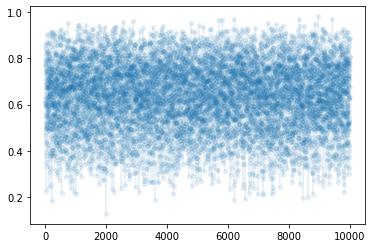

In [6]:
plt.plot(samples, marker='o', alpha=.1, markersize=4)

### Code 3.5

<AxesSubplot:ylabel='Density'>

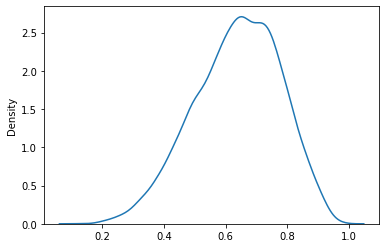

In [7]:
sns.kdeplot(samples)

### Code 3.6

In [8]:
posterior[p_grid < .5].sum()

0.17187458902022873

### Code 3.7

In [9]:
(samples < .5).mean()

0.1763

### Code 3.8

In [10]:
((samples > .5) & (samples < .75)).mean()

0.5985

### Code 3.9

In [11]:
np.quantile(samples, .8)

0.7607607607607607

### Code 3.10

In [12]:
np.quantile(samples, [.1, .9])

array([0.44544545, 0.81081081])

### Code 3.11

In [13]:
p_grid, posterior = posterior_grid_approx(success=3, tosses=3)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

### Code 3.12

In [14]:
np.quantile(samples, [.25, .75])

array([0.70707071, 0.93939394])

### Code 3.13

In [15]:
az.hdi(samples, .5)

array([0.84848485, 1.        ])

### Code 3.14

In [16]:
p_grid[np.argmax(posterior)]

1.0

### Code 3.15

In [17]:
stats.mode(samples)[0]

array([1.])

### Code 3.16

In [18]:
print(samples.mean())
print(np.quantile(samples, .5))

0.8035
0.8484848484848485


### Code 3.17

In [19]:
(np.abs((p_grid - .5)) * posterior).sum()

0.31626874808692995

### Code 3.18

In [20]:
loss = np.array([(np.abs(p_grid - x) * posterior).sum() for x in p_grid])

### Code 3.19

In [21]:
p_grid[np.argmin(loss)]

0.8484848484848485

### Code 3.20

In [22]:
stats.binom.pmf(k=[0, 1, 2], n=2, p=0.7)

array([0.09, 0.42, 0.49])

### Code 3.21

In [23]:
stats.binom.rvs(n=2, size=1, p=0.7)

array([2])

### Code 3.22

In [24]:
stats.binom.rvs(n=2, size=10, p=0.7)

array([1, 2, 2, 1, 1, 1, 2, 1, 2, 2])

### Code 3.23

In [25]:
dummy_w = stats.binom.rvs(n=2, size=10000, p=0.7)
pd.Series(dummy_w).value_counts(normalize=True)

2    0.4887
1    0.4244
0    0.0869
dtype: float64

### Code 3.24

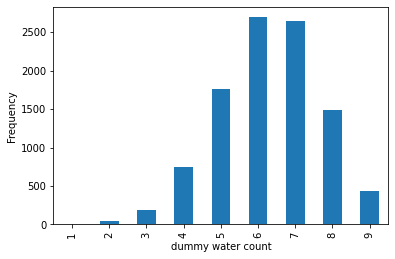

In [26]:
dummy_w = stats.binom.rvs(n=9, size=10_000, p=0.7)
dummy_w_count = pd.Series(dummy_w).value_counts().sort_index()
ax = dummy_w_count.plot.bar()
ax.set_xlabel("dummy water count")
ax.set_ylabel("Frequency")
plt.show()

### Code 3.25

In [27]:
w = stats.binom.rvs(n=9, size=10_000, p=0.6)

### Code 3.26 

In [28]:
p_grid, posterior = posterior_grid_approx(grid_points=1000, success=6, tosses=9)
samples = np.random.choice(p_grid, size=10000, replace=True, p=posterior)

w = stats.binom.rvs(n=9, size=10_000, p=samples)

## Figures

### Figure 3.1

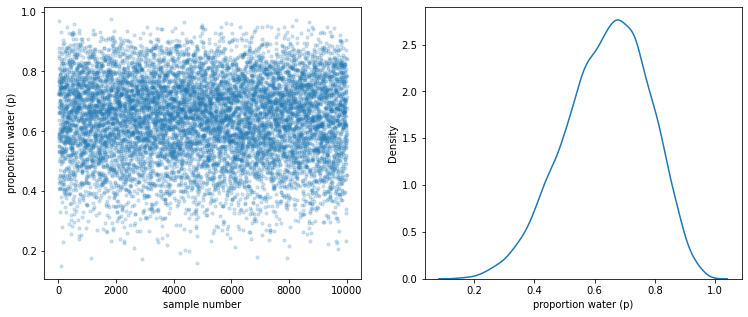

In [29]:
p_grid, posterior = posterior_grid_approx(grid_points=1000, success=6, tosses=9)
samples = np.random.choice(p_grid, size=10000, replace=True, p=posterior)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.5, 5))

ax1.scatter(range(len(samples)), samples, marker='o', alpha=.2, s=10)
ax1.set_ylabel("proportion water (p)")
ax1.set_xlabel("sample number")

sns.kdeplot(samples, ax=ax2)
ax2.set_ylabel("Density")
ax2.set_xlabel("proportion water (p)")

plt.show()

### Figure 3.2

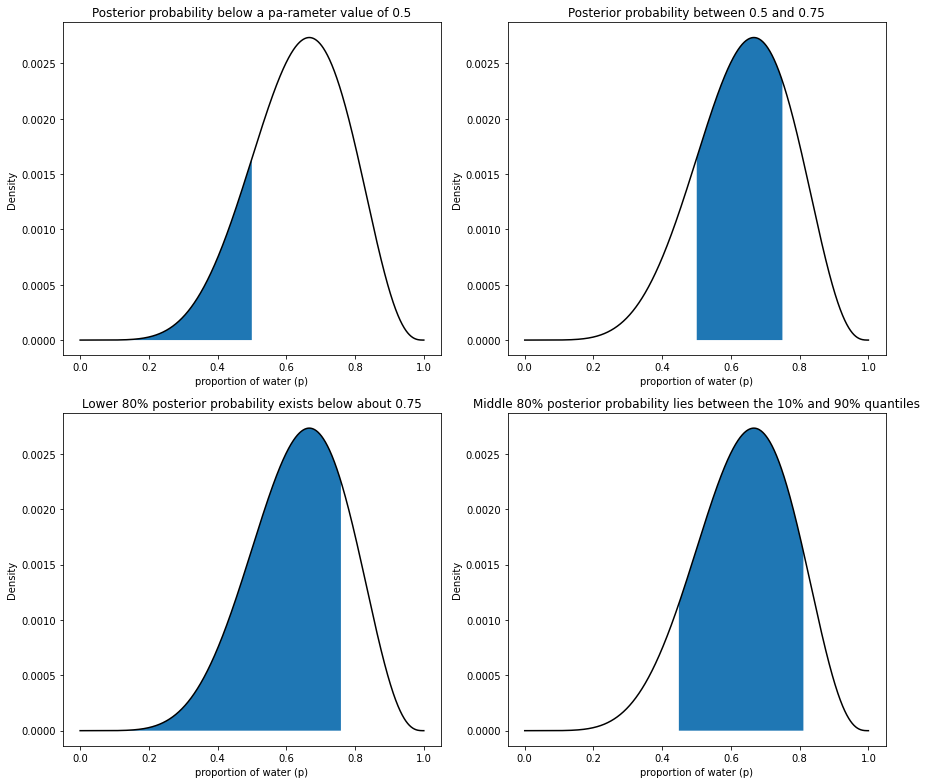

In [30]:
# Generate the data
p_grid, posterior = posterior_grid_approx(grid_points=1000, success=6, tosses=9)
samples = np.random.choice(p_grid, size=10000, replace=True, p=posterior)

# Plot parameters
defined_boundaries = [
    (0.00, 0.50),
    (0.50, 0.75)
]

defined_mass = [
    (0.0, 0.80),
    (0.1, 0.90),
]

titles = [
    'Posterior probability below a pa-rameter value of 0.5',
    'Posterior probability between 0.5 and 0.75',
    'Lower 80% posterior probability exists below about 0.75',
    'Middle 80% posterior probability lies between the 10% and 90% quantiles',
]

# Plot
fig, axes = plt.subplots(2, 2, figsize=(12.5, 11))

for ax, title in zip(axes.ravel(), titles):
    ax.plot(p_grid, posterior, color='black')
    ax.set_xlabel("proportion of water (p)")
    ax.set_ylabel("Density")
    ax.set_title(title)
    
for ax, (bond_min, bond_max) in zip(axes[0, :], defined_boundaries):
    ax.fill_between(np.where((p_grid > bond_min) & (p_grid < bond_max), p_grid, np.NaN), 0, posterior)
    
for ax, qs in zip(axes[1, :], defined_mass):
    qmin, qmax = np.quantile(samples, q=qs)
    ax.fill_between(np.where((p_grid > qmin) & (p_grid < qmax), p_grid, np.NaN), 0, posterior)
    
fig.tight_layout()
plt.show()

### Figure 3.3

In [31]:
def plot_pi_hdi(samples: np.ndarray, p_grid: np.ndarray, posterior: np.ndarray):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.5, 5))

    ax1.plot(p_grid, posterior, color='black')
    qmin, qmax = np.quantile(samples, [.25, .75])
    mask = np.where((p_grid > qmin) & (p_grid < qmax), posterior, np.nan)
    ax1.fill_between(p_grid, 0, mask)
    ax1.set_xlabel("proportion water (p)")
    ax1.set_ylabel("Density")
    ax1.set_title("50% Percentile Interval")

    ax2.plot(p_grid, posterior, color='black')
    qmin, qmax = az.hdi(samples, .5)
    mask = np.where((p_grid > qmin) & (p_grid < qmax), posterior, np.nan)
    ax2.fill_between(p_grid, 0, mask)
    ax2.set_xlabel("proportion water (p)")
    ax2.set_ylabel("Density")
    ax2.set_title("50% HPDI")

    plt.show()

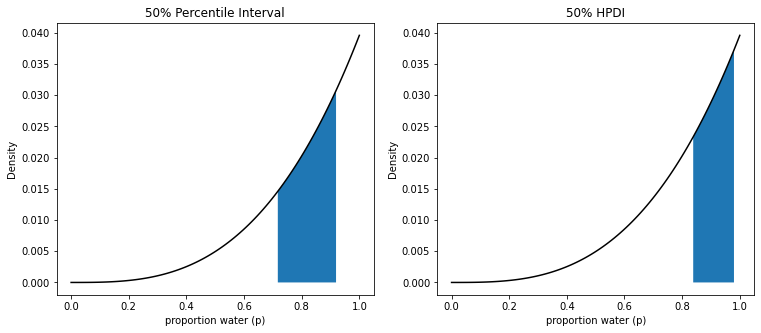

In [32]:
p_grid, posterior = posterior_grid_approx(success=3, tosses=3)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
plot_pi_hdi(samples, p_grid, posterior)

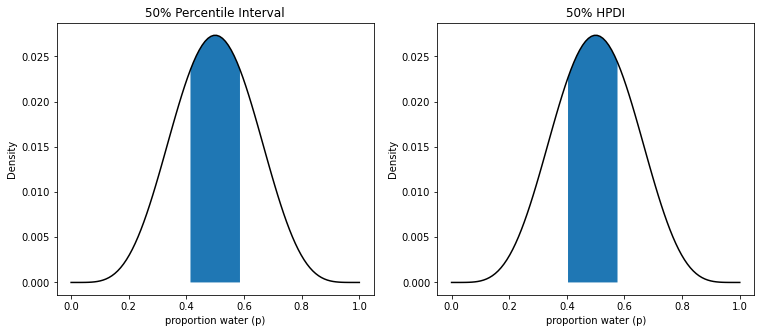

In [33]:
p_grid, posterior = posterior_grid_approx(success=5, tosses=10)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
plot_pi_hdi(samples, p_grid, posterior)

### Figure 3.4

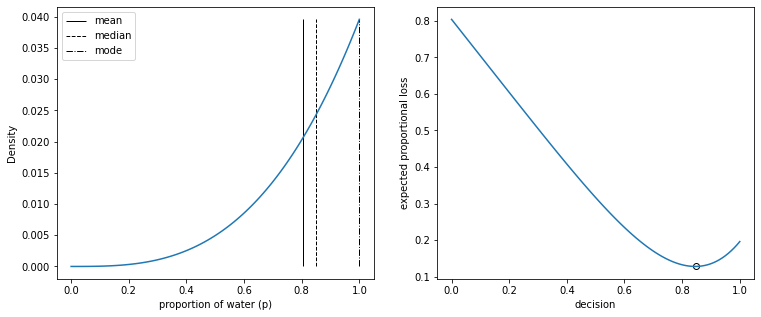

In [34]:
p_grid, posterior = posterior_grid_approx(success=3, tosses=3)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
loss = np.array([(np.abs(p_grid - x) * posterior).sum() for x in p_grid])
best_prob = p_grid[np.argmin(loss)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.5, 5))

ax1.plot(p_grid, posterior)
ax1.vlines(samples.mean(), posterior.min(), posterior.max(), color='black', linewidth=1, label='mean', linestyle='-')
ax1.vlines(np.quantile(samples, q=0.5), posterior.min(), posterior.max(), color='black', linewidth=1, label='median', linestyle='--')
ax1.vlines(stats.mode(samples)[0][0], posterior.min(), posterior.max(), color='black', linewidth=1, label='mode', linestyle='-.')
ax1.set_xlabel("proportion of water (p)")
ax1.set_ylabel("Density")
ax1.legend()

ax2.plot(p_grid, loss)
ax2.scatter(best_prob, loss.min(), c='white', edgecolors='black')
ax2.set_ylabel("expected proportional loss")
ax2.set_xlabel("decision")

plt.show()

### Figure 3.5

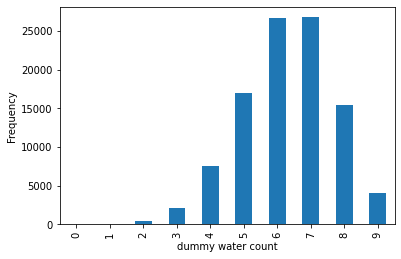

In [35]:
dummy_w = stats.binom.rvs(n=9, size=100_000, p=0.7)
ax = simplehist(dummy_w)
ax.set_xlabel("dummy water count")
ax.set_ylabel("Frequency")
plt.show()